<a href="https://colab.research.google.com/github/s-choung/Simulation_tutorials/blob/main/handson_09_MLP02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Pre installation__

## Get GPAW for DFT calculation

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install tqdm

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,700 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,452 kB]
Get:13 https://developer.download.nvidia.com/compute/cuda/

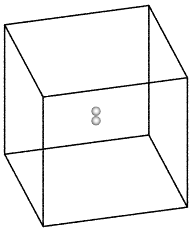

In [2]:
!apt-get update
!apt-get install -y python3-dev libopenblas-dev liblapack-dev libfftw3-dev libxc-dev
!pip install gpaw
!gpaw test
!wget https://wiki.fysik.dtu.dk/gpaw-files/gpaw-setups-24.1.0.tar.gz
!tar -xzf gpaw-setups-24.1.0.tar.gz

import os
import gzip
import shutil

# Define the path to the setup files
setup_path = '/content/gpaw-setups-24.1.0'

# Uncompress all .gz files in the setup directory
for filename in os.listdir(setup_path):
    if filename.endswith('.gz'):
        filepath = os.path.join(setup_path, filename)
        with gzip.open(filepath, 'rb') as f_in:
            with open(filepath[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

# Set the GPAW_SETUP_PATH environment variable
os.environ['GPAW_SETUP_PATH'] = setup_path
# Verify the environment variable
print("GPAW_SETUP_PATH:", os.environ['GPAW_SETUP_PATH'])

# Import ASE and GPAW and run your calculation
from ase import Atoms
from gpaw import GPAW

# Define the atomic structure
d = 0.74
a = 10.0

h2 = Atoms('H2',
              positions=[(0, 0, 0),
                         (0, 0, d)],
              cell=(a, a, a))
h2.center()
# Initialize GPAW calculator without specifying the 'setups' parameter
calc = GPAW(mode='fd', nbands=2, txt='h2.txt')
h2.calc = calc

# Run the calculation
print("Forces on atoms:", h2.get_forces())
print("Energies on atoms:", h2.get_total_energy())

!sudo apt-get install povray  ## visulization program

import shutil
from ase.io import write  # Import the write function from ASE
from PIL import Image
from IPython.display import display  # Import display for Jupyter Notebooks


def visual(structure, max_size=(200, 200), stretch_y=2.0, rotation='15z,-60x', png_save_path='./'):
    renderer = write('./temp.pov', structure, rotation=rotation)
    renderer.render()
    image_path = './temp.png'
    img = Image.open(image_path)
    display(img)

    files = ['./temp.ini', './temp.pov', './temp.png']
    destination = './output/'

    os.makedirs(destination, exist_ok=True)

    for file in files:
        if os.path.isfile(os.path.join(destination, os.path.basename(file))):
            os.remove(os.path.join(destination, os.path.basename(file)))

        if file == './temp.png':
            new_file_name = png_save_path + f'temp.png'
        else:
            new_file_name = os.path.basename(file)
        shutil.move(file, os.path.join(destination, new_file_name))
visual(h2)

## Get Mace for MLP calculation

- Github from https://github.com/ACEsuit/mace

In [3]:
!pip install --upgrade pip
!pip install mace-torch
!pip install pymatgen
!pip install ase

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 27.9 MB/s eta 0:00:00
  Created wheel for python-hostlist: filename=python_hostlist-2.0.0-py3-none-any.whl size=39465 sha256=84a36d2d886ca722139f150d45125ec929f3e0e57601a6830ddfe691d10caef6
  Stored in directory: /root/.cache/pip/wheels/71/e9/0b/1e7a2ca15b702dd36c81c33dad4c23773270dc417eca48dc72
Successfully built python-hostlist
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 M

In [36]:
def enlarge_and_visual(atoms,angle='15z,-60x'):
  temp=atoms.copy()
  temp=temp*(3,3,1)
  temp.cell=atoms.cell
  visual(temp, rotation=angle)

# Comparison between GPAW to MLP for hands-on 2~4

### __Hands-on 2 : calculate surface energy__

We will run a full relaxation

In [4]:
from ase.optimize import LBFGS
import copy
from ase.build import bulk
from ase.constraints import ExpCellFilter

def energy_cal(atoms,calc,lattice_relax = False,relax_atoms = True,fmax=0.05):
    if not relax_atoms:
        atoms_copied = copy.deepcopy(atoms)
    else:
        atoms_copied = atoms
    atoms_copied.calc = calc
    tags = np.ones(len(atoms_copied))
    atoms_copied.set_tags(tags)
    if lattice_relax:
      ecf = ExpCellFilter(atoms_copied)
      optimizer = LBFGS(ecf)
    else:
      optimizer = LBFGS(atoms_copied)
    optimizer.run(fmax=fmax)
    return atoms_copied.get_potential_energy()

In [22]:
import time
import numpy as np
from ase.build import fcc100, fcc110, fcc111,bulk
from ase.constraints import FixAtoms
from gpaw import GPAW, PW
from mace.calculators import mace_mp

element='Pt'
mace_calc = mace_mp(model="medium", dispersion=False, default_dtype="float32",device= "cpu")
bulk_pt=bulk(element, 'fcc')
# Single point calculation
bulk_atoms = bulk_pt.copy()
bulk_atoms.calc = mace_calc

##### Exercise: Finish energy calculation of bulk
E_bulk_single_point = ########
E_bulk_per_atom_sp = E_bulk_single_point / len(bulk_atoms)
print(f"Single point result: {E_bulk_per_atom_sp = :.2f} eV")


Using Materials Project MACE for MACECalculator with /root/.cache/mace/20231203mace128L1_epoch199model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


Single point result: E_bulk_per_atom_sp = -6.01 eV


In [23]:
# Full relaxation calculation

element='Pt'
mace_calc = mace_mp(model="medium", dispersion=False, default_dtype="float32",device= "cpu")
bulk_pt=bulk(element, 'fcc')
bulk_atoms_fr = bulk_pt.copy()
E_bulk_full_relax = energy_cal(bulk_atoms_fr,mace_calc,lattice_relax=True)
E_bulk_per_atom_fr = E_bulk_full_relax / len(bulk_atoms_fr)
print(f"Full relaxation result{E_bulk_per_atom_fr = :.2f} eV")

Using Materials Project MACE for MACECalculator with /root/.cache/mace/20231203mace128L1_epoch199model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


       Step     Time          Energy          fmax
LBFGS:    0 23:38:50       -6.013740        1.007499


<ipython-input-4-cbffc74fa8cc>:15: FutureWarning: Import ExpCellFilter from ase.filters
  ecf = ExpCellFilter(atoms_copied)


LBFGS:    1 23:38:51       -6.034801        0.002721
Full relaxation resultE_bulk_per_atom_fr = -6.03 eV


Using Materials Project MACE for MACECalculator with /root/.cache/mace/20231203mace128L1_epoch199model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)
<ipython-in

       Step     Time          Energy          fmax
LBFGS:    0 00:01:26       -3.728237        0.051966
LBFGS:    1 00:01:26       -3.728335        0.036945
(calc : MACE) E_bulk : -3.73 eV
       Step     Time          Energy          fmax
LBFGS:    0 00:01:27      -14.066466        0.026158
(calc : MACE) Surface: fcc100
(calc : MACE) Potential Energy: -14.07 eV
(calc : MACE) Time taken: 0.20 seconds


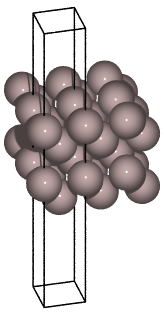

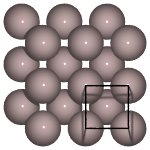

fcc100(calc : MACE) surface energy: 0.052 

       Step     Time          Energy          fmax
LBFGS:    0 00:01:29      -13.651780        0.504000
LBFGS:    1 00:01:29      -13.656390        0.476500
LBFGS:    2 00:01:30      -13.693598        0.064979
LBFGS:    3 00:01:30      -13.693689        0.051639
LBFGS:    4 00:01:30      -13.693785        0.041600
(calc : MACE) Surface: fcc110
(calc : MACE) Potential Energy: -13.69 eV
(calc : MACE) Time taken: 1.04 seconds


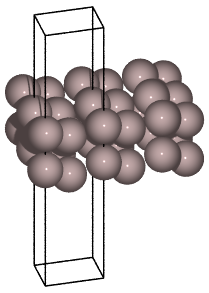

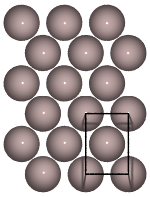

fcc110(calc : MACE) surface energy: 0.053 

       Step     Time          Energy          fmax
LBFGS:    0 00:01:33      -14.340387        0.027612
(calc : MACE) Surface: fcc111
(calc : MACE) Potential Energy: -14.34 eV
(calc : MACE) Time taken: 0.16 seconds


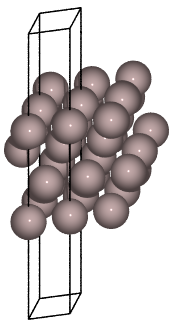

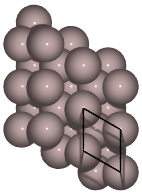

fcc111(calc : MACE) surface energy: 0.04 



In [38]:
element='Al'
size = 1  # supercell size
vac = 7.5  # vacuum size
N_layer = 4

calc_name, calc ='MACE' , mace_mp(model="medium",  dispersion=False,  default_dtype="float32",  device= "cpu")

bulk_atoms = bulk(element, 'fcc')
bulk_atoms.calc = calc
E_bulk = energy_cal(bulk_atoms,calc,lattice_relax=True)
print(f"(calc : {calc_name}) E_bulk : {E_bulk:.2f} eV")
fcc_surfaces = [('fcc100', fcc100), ('fcc110', fcc110), ('fcc111', fcc111)]


for surface_name, surface_function in fcc_surfaces:

    surf = surface_function(element, (size, size, N_layer), vacuum=vac)
    median_z = np.median(surf.positions[:, 2])
    constraint = FixAtoms(mask=[atom.position[2] < (median_z + 0.01) for atom in surf])
    surf.set_constraint(constraint)
    surf.calc = calc

    start_time = time.time()
    e = energy_cal(surf,calc)
    elapsed_time = time.time() - start_time

    # Print the results
    print(f'(calc : {calc_name}) Surface: {surface_name}')
    print(f'(calc : {calc_name}) Potential Energy: {e:.2f} eV')
    print(f'(calc : {calc_name}) Time taken: {elapsed_time:.2f} seconds')

    a1 = surf.get_cell()[0]  # First lattice vector (in the surface plane)
    a2 = surf.get_cell()[1]  # Second lattice vector (in the surface plane)
    # Calculate the surface area as the magnitude of the cross product
    A = np.linalg.norm(np.cross(a1, a2))
    E_slab= surf.get_potential_energy()
    enlarge_and_visual(surf)
    enlarge_and_visual(surf,angle='90z,-0x') # topview
    n_atoms = len(surf)  # number of atoms in the slab

    ##### Exercise: Formulate surface energy calculation using: E_slab, n_atoms, E_bulk) and A
    surface_energy = ########
    print(f'{surface_name}(calc : {calc_name}) surface energy:',round(surface_energy,3),'\n')

### __Hands-on 3 : calculate CO adsorption energy__

       Step     Time          Energy          fmax
LBFGS:    0 23:48:54      -23.090153        0.295799
LBFGS:    1 23:48:54      -23.091352        0.269016
LBFGS:    2 23:48:54      -23.097761        0.204575
LBFGS:    3 23:48:54      -23.098837        0.228403
LBFGS:    4 23:48:54      -23.101044        0.224378
LBFGS:    5 23:48:55      -23.102917        0.165818
LBFGS:    6 23:48:55      -23.104263        0.070172
LBFGS:    7 23:48:55      -23.104603        0.013090
Using Materials Project MACE for MACECalculator with /root/.cache/mace/20231203mace128L1_epoch199model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


Default dtype float32 does not match model dtype float64, converting models to float32.
       Step     Time          Energy          fmax
LBFGS:    0 23:48:55      -14.219156        5.723266
LBFGS:    1 23:48:56      -13.746758        8.512238
LBFGS:    2 23:48:56      -14.308876        2.203780
LBFGS:    3 23:48:56      -14.326823        1.256661
LBFGS:    4 23:48:56      -14.333645        0.113176
LBFGS:    5 23:48:56      -14.333709        0.009646
size: <<<1x1>>>


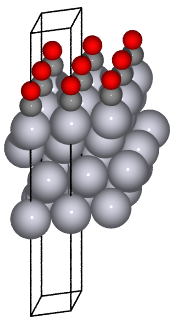

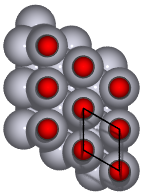

       Step     Time          Energy          fmax
LBFGS:    0 23:49:00      -38.656956        2.973612
LBFGS:    1 23:49:00      -38.646351        5.046995
LBFGS:    2 23:49:00      -38.757141        1.061185
LBFGS:    3 23:49:00      -38.782883        0.662586
LBFGS:    4 23:49:01      -38.807598        0.723723
LBFGS:    5 23:49:01      -38.818634        0.499320
LBFGS:    6 23:49:01      -38.824711        0.259885
LBFGS:    7 23:49:01      -38.828953        0.399517
LBFGS:    8 23:49:01      -38.835541        0.679240
LBFGS:    9 23:49:02      -38.851448        1.026237
LBFGS:   10 23:49:02      -38.878788        1.156482
LBFGS:   11 23:49:02      -38.905014        0.729080
LBFGS:   12 23:49:02      -38.912537        0.233488
LBFGS:   13 23:49:02      -38.913658        0.047616
(calc = MACE) Adsorption energy: -1.48 eV
(calc = MACE) Time taken: 6.07 seconds

       Step     Time          Energy          fmax
LBFGS:    0 23:49:02      -14.219156        5.723266
LBFGS:    1 23:49:03 

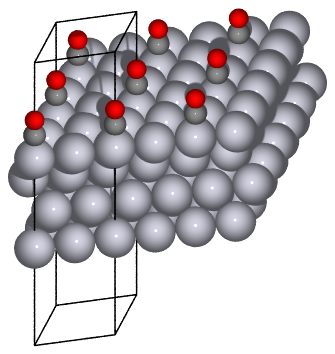

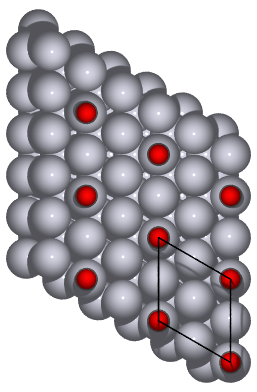

       Step     Time          Energy          fmax
LBFGS:    0 23:49:08     -108.380074        2.611356
LBFGS:    1 23:49:09     -108.390137        3.758758
LBFGS:    2 23:49:10     -108.453423        0.600439
LBFGS:    3 23:49:11     -108.464081        0.412103
LBFGS:    4 23:49:13     -108.483627        0.633789
LBFGS:    5 23:49:14     -108.492592        0.456408
LBFGS:    6 23:49:15     -108.498886        0.188318
LBFGS:    7 23:49:16     -108.503349        0.338412
LBFGS:    8 23:49:16     -108.510117        0.627585
LBFGS:    9 23:49:17     -108.519295        0.714935
LBFGS:   10 23:49:17     -108.526917        0.454168
LBFGS:   11 23:49:17     -108.530983        0.165854
LBFGS:   12 23:49:18     -108.533379        0.128373
LBFGS:   13 23:49:18     -108.535133        0.212266
LBFGS:   14 23:49:19     -108.536591        0.162096
LBFGS:   15 23:49:19     -108.537674        0.074465
LBFGS:   16 23:49:19     -108.538467        0.082617
LBFGS:   17 23:49:20     -108.539162        0.14

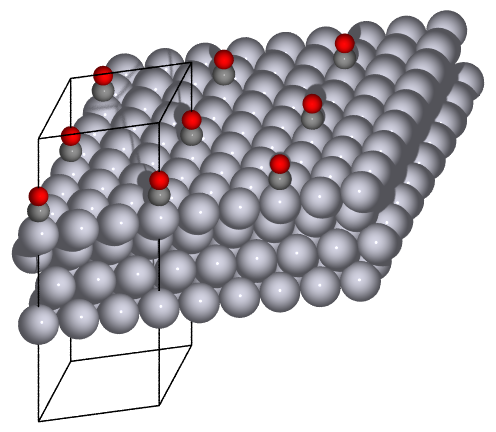

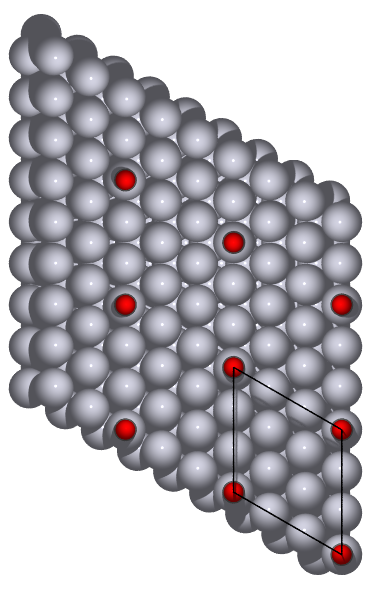

       Step     Time          Energy          fmax
LBFGS:    0 23:49:33     -223.902008        2.597169
LBFGS:    1 23:49:34     -223.915436        3.707785
LBFGS:    2 23:49:35     -223.978989        0.581435
LBFGS:    3 23:49:36     -223.991104        0.460561
LBFGS:    4 23:49:37     -224.013016        0.649508
LBFGS:    5 23:49:38     -224.022263        0.460776
LBFGS:    6 23:49:39     -224.029175        0.185724
LBFGS:    7 23:49:41     -224.034729        0.412544
LBFGS:    8 23:49:43     -224.043198        0.685784
LBFGS:    9 23:49:45     -224.052307        0.651204
LBFGS:   10 23:49:46     -224.058426        0.323424
LBFGS:   11 23:49:47     -224.062408        0.140595
LBFGS:   12 23:49:48     -224.066635        0.294618
LBFGS:   13 23:49:49     -224.071121        0.419970
LBFGS:   14 23:49:50     -224.074646        0.312076
LBFGS:   15 23:49:51     -224.076385        0.094556
LBFGS:   16 23:49:51     -224.076996        0.044362
(calc = MACE) Adsorption energy: -1.8 eV
(calc =

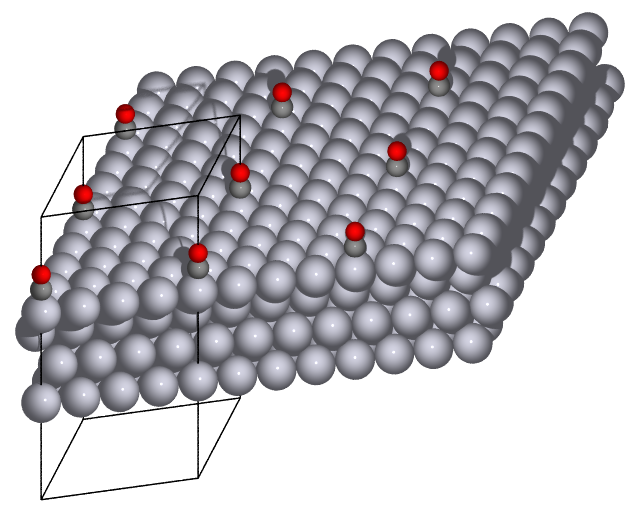

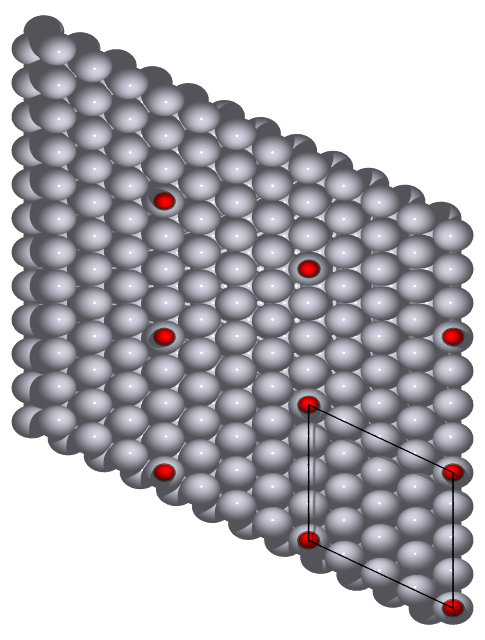

       Step     Time          Energy          fmax
LBFGS:    0 23:50:05     -385.634033        2.597630
LBFGS:    1 23:50:06     -385.648193        3.707677
LBFGS:    2 23:50:08     -385.712677        0.586524
LBFGS:    3 23:50:11     -385.725739        0.472029
LBFGS:    4 23:50:14     -385.748840        0.651564
LBFGS:    5 23:50:18     -385.758026        0.448054
LBFGS:    6 23:50:21     -385.763855        0.183314
LBFGS:    7 23:50:24     -385.768280        0.391380
LBFGS:    8 23:50:26     -385.776428        0.734925
LBFGS:    9 23:50:31     -385.787598        0.852623
LBFGS:   10 23:50:33     -385.796997        0.549655
LBFGS:   11 23:50:34     -385.802002        0.170058
LBFGS:   12 23:50:35     -385.805420        0.174909
LBFGS:   13 23:50:37     -385.808197        0.313617
LBFGS:   14 23:50:38     -385.810699        0.271562
LBFGS:   15 23:50:40     -385.812347        0.102602
LBFGS:   16 23:50:41     -385.813141        0.056947
LBFGS:   17 23:50:43     -385.813660        0.11

In [31]:
from fractions import Fraction
from ase.build import add_adsorbate

# Initialize the parameters
a0 = 3.93  # fcc lattice parameter
element='Pt'
N_layer = 4 # number of layers
size = 1 #  supercell size
vac = 7.5


surf = fcc111(element, (size, size, N_layer), a=a0, vacuum=vac)
median_z = np.median(surf.positions[:, 2])
constraint = FixAtoms(mask=[atom.position[2] < (median_z + 0.01) for atom in surf])
surf.set_constraint(constraint)
E_slab=energy_cal(surf,calc)

CO_binding_list=[]
calc_name, calc ='MACE' , mace_mp(model="medium",  dispersion=False,  default_dtype="float32",  device= "cpu")
sizes = [1, 2, 3, 4]

for size in sizes:
    CO = Atoms('CO',
                positions=[(0, 0, 0),
                            (0, 0, 1.1)],
                cell=(a, a, a),pbc='TRUE')

    CO.calc = calc
    E_CO = energy_cal(CO,calc)

    coverage = Fraction(1, size*size)
    print(f'size: <<<{size}x{size}>>>')
    start_time = time.time()  # Start timing
    adslab = surf.copy()
    adslab=adslab * (size,size,1) ## BECAREFUL YOUR CALCULATION COULD BE EXTREAMELY HEAVY for size 3 or more
    add_adsorbate(adslab, CO, 1.8, 'ontop')
    enlarge_and_visual(adslab)
    enlarge_and_visual(adslab,angle='90z,-0x') # topview

    adslab.calc = calc
    E_adslab =  energy_cal(adslab,calc)
    E_slab_tot=E_slab * size * size
    ##### Exercise: Formulate adsorption energy energy calculation using: E_adslab, E_CO and E_slab_tot
    E_ads = #######
    CO_binding_list.append(E_ads)


    elapsed_time = time.time() - start_time
    # Print results
    print(f'(calc = {calc_name}) Adsorption energy: {round(E_ads, 2)} eV')
    print(f'(calc = {calc_name}) Time taken: {elapsed_time:.2f} seconds\n')

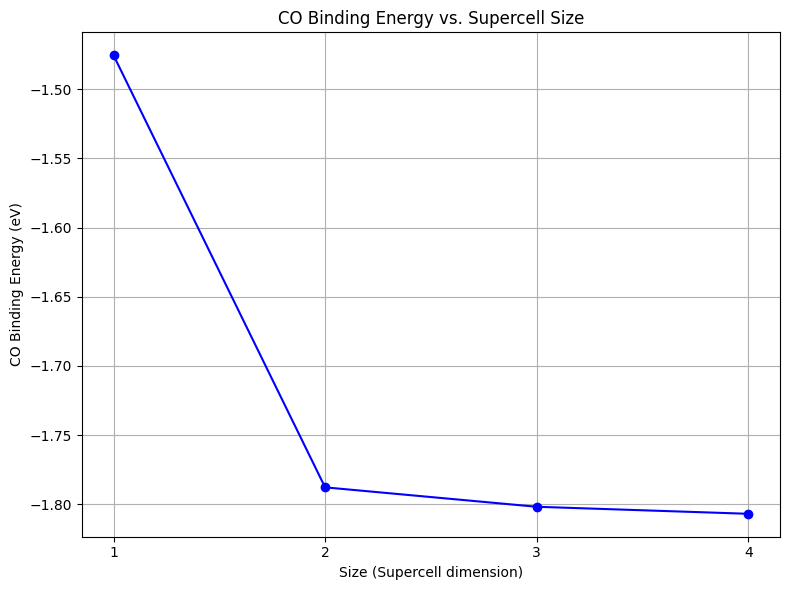

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(sizes, CO_binding_list, marker='o', linestyle='-', color='b')
plt.xlabel("Size (Supercell dimension)")
plt.ylabel("CO Binding Energy (eV)")
plt.title("CO Binding Energy vs. Supercell Size")
plt.xticks(sizes)
plt.grid(True)
plt.tight_layout()
plt.show()

### __Hands-on 4 : Make H volcano plot__

Using Materials Project MACE for MACECalculator with /root/.cache/mace/20231203mace128L1_epoch199model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.
Default dtype float32 does not match model dtype float64, converting models to float32.
Running simulation for Au


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


       Step     Time          Energy          fmax
LBFGS:    0 00:05:45      -12.281578        0.648006
LBFGS:    1 00:05:45      -12.287497        0.595346
LBFGS:    2 00:05:46      -12.321779        0.373238
LBFGS:    3 00:05:46      -12.328454        0.460141
LBFGS:    4 00:05:46      -12.337124        0.504648
LBFGS:    5 00:05:46      -12.346803        0.464837
LBFGS:    6 00:05:46      -12.357109        0.342073
LBFGS:    7 00:05:46      -12.364717        0.192284
LBFGS:    8 00:05:47      -12.368837        0.049869
(calc = MACE) Time taken for slab energy calculation: 1.58 seconds
       Step     Time          Energy          fmax
LBFGS:    0 00:05:47       -5.426504        5.052353
LBFGS:    1 00:05:47       -6.069035        4.057949
LBFGS:    2 00:05:47       -5.516536       13.457214
LBFGS:    3 00:05:47       -6.391144        2.745935
LBFGS:    4 00:05:47       -6.509168        1.784902
LBFGS:    5 00:05:47       -6.543470        1.537869
LBFGS:    6 00:05:47       -6.566714

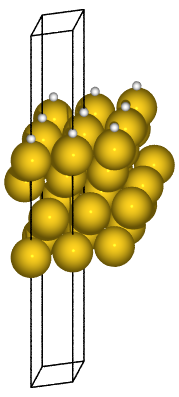

(calc = MACE) Adsorption energy for Au: 0.6991 eV

Running simulation for Pt
       Step     Time          Energy          fmax
LBFGS:    0 00:05:52      -23.084995        0.378080
LBFGS:    1 00:05:52      -23.086946        0.343214
LBFGS:    2 00:05:53      -23.097782        0.264241
LBFGS:    3 00:05:53      -23.099806        0.295841
LBFGS:    4 00:05:53      -23.103088        0.285937
LBFGS:    5 00:05:54      -23.105934        0.214138
LBFGS:    6 00:05:54      -23.108139        0.097508
LBFGS:    7 00:05:54      -23.108799        0.019118
(calc = MACE) Time taken for slab energy calculation: 2.15 seconds
       Step     Time          Energy          fmax
LBFGS:    0 00:05:54       -5.426504        5.052353
LBFGS:    1 00:05:54       -6.069035        4.057949
LBFGS:    2 00:05:54       -5.516536       13.457214
LBFGS:    3 00:05:54       -6.391144        2.745935
LBFGS:    4 00:05:55       -6.509168        1.784902
LBFGS:    5 00:05:55       -6.543470        1.537869
LBFGS:    6 

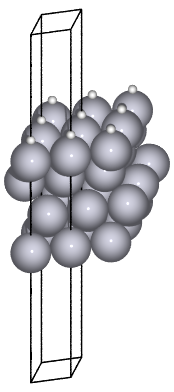

(calc = MACE) Adsorption energy for Pt: -0.0307 eV

Running simulation for Cu
       Step     Time          Energy          fmax
LBFGS:    0 00:05:59      -15.422516        0.067773
LBFGS:    1 00:05:59      -15.422625        0.061074
LBFGS:    2 00:06:00      -15.422986        0.015482
(calc = MACE) Time taken for slab energy calculation: 0.51 seconds
       Step     Time          Energy          fmax
LBFGS:    0 00:06:00       -5.426504        5.052353
LBFGS:    1 00:06:00       -6.069035        4.057949
LBFGS:    2 00:06:00       -5.516536       13.457214
LBFGS:    3 00:06:00       -6.391144        2.745935
LBFGS:    4 00:06:00       -6.509168        1.784902
LBFGS:    5 00:06:00       -6.543470        1.537869
LBFGS:    6 00:06:00       -6.566714        0.343711
LBFGS:    7 00:06:00       -6.568492        0.082827
LBFGS:    8 00:06:01       -6.568589        0.009410
(calc = MACE) Time taken for gas energy calculation: 1.02 seconds
       Step     Time          Energy          fmax


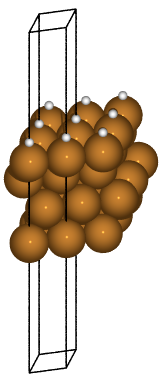

(calc = MACE) Adsorption energy for Cu: 0.5162 eV

Running simulation for Pd
       Step     Time          Energy          fmax
LBFGS:    0 00:06:02      -19.631626        0.360830
LBFGS:    1 00:06:03      -19.633533        0.336924
LBFGS:    2 00:06:03      -19.653109        0.283003
LBFGS:    3 00:06:03      -19.655066        0.276632
LBFGS:    4 00:06:03      -19.657766        0.213910
LBFGS:    5 00:06:03      -19.659750        0.114257
LBFGS:    6 00:06:03      -19.660646        0.029050
(calc = MACE) Time taken for slab energy calculation: 1.07 seconds
       Step     Time          Energy          fmax
LBFGS:    0 00:06:03       -5.426504        5.052353
LBFGS:    1 00:06:04       -6.069035        4.057949
LBFGS:    2 00:06:04       -5.516536       13.457214
LBFGS:    3 00:06:04       -6.391144        2.745935
LBFGS:    4 00:06:04       -6.509168        1.784902
LBFGS:    5 00:06:04       -6.543470        1.537869
LBFGS:    6 00:06:04       -6.566714        0.343711
LBFGS:    7 

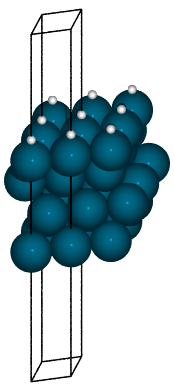

(calc = MACE) Adsorption energy for Pd: 0.1691 eV

Running simulation for Ag
       Step     Time          Energy          fmax
LBFGS:    0 00:06:09      -10.674779        0.245235
LBFGS:    1 00:06:09      -10.675674        0.237100
LBFGS:    2 00:06:10      -10.694231        0.168996
LBFGS:    3 00:06:10      -10.695662        0.171495
LBFGS:    4 00:06:10      -10.696487        0.158307
LBFGS:    5 00:06:10      -10.697490        0.125505
LBFGS:    6 00:06:10      -10.698719        0.065349
LBFGS:    7 00:06:10      -10.699378        0.019538
(calc = MACE) Time taken for slab energy calculation: 1.23 seconds
       Step     Time          Energy          fmax
LBFGS:    0 00:06:10       -5.426504        5.052353
LBFGS:    1 00:06:11       -6.069035        4.057949
LBFGS:    2 00:06:11       -5.516536       13.457214
LBFGS:    3 00:06:11       -6.391144        2.745935
LBFGS:    4 00:06:11       -6.509168        1.784902
LBFGS:    5 00:06:11       -6.543470        1.537869
LBFGS:    6 

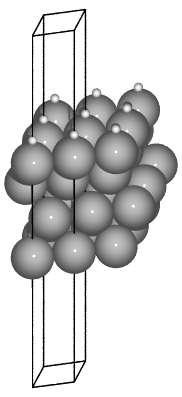

(calc = MACE) Adsorption energy for Ag: 1.0176 eV

Running simulation for Ir
       Step     Time          Energy          fmax
LBFGS:    0 00:06:15      -33.707909        0.467452
LBFGS:    1 00:06:15      -33.710758        0.362798
LBFGS:    2 00:06:15      -33.715000        0.195725
LBFGS:    3 00:06:16      -33.715546        0.189500
LBFGS:    4 00:06:16      -33.719608        0.018494
(calc = MACE) Time taken for slab energy calculation: 0.79 seconds
       Step     Time          Energy          fmax
LBFGS:    0 00:06:16       -5.426504        5.052353
LBFGS:    1 00:06:16       -6.069035        4.057949
LBFGS:    2 00:06:16       -5.516536       13.457214
LBFGS:    3 00:06:16       -6.391144        2.745935
LBFGS:    4 00:06:16       -6.509168        1.784902
LBFGS:    5 00:06:16       -6.543470        1.537869
LBFGS:    6 00:06:16       -6.566714        0.343711
LBFGS:    7 00:06:17       -6.568492        0.082827
LBFGS:    8 00:06:17       -6.568589        0.009410
(calc = MACE

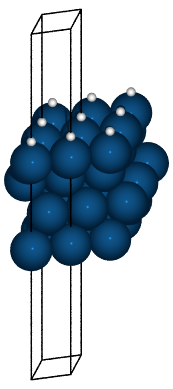

(calc = MACE) Adsorption energy for Ir: -0.1820 eV

Running simulation for Rh
       Step     Time          Energy          fmax
LBFGS:    0 00:06:20      -28.238945        0.560894
LBFGS:    1 00:06:20      -28.243727        0.428236
LBFGS:    2 00:06:21      -28.249647        0.099856
LBFGS:    3 00:06:21      -28.249784        0.084905
LBFGS:    4 00:06:21      -28.250628        0.080412
LBFGS:    5 00:06:21      -28.251089        0.064728
LBFGS:    6 00:06:22      -28.251274        0.022437
(calc = MACE) Time taken for slab energy calculation: 1.60 seconds
       Step     Time          Energy          fmax
LBFGS:    0 00:06:22       -5.426504        5.052353
LBFGS:    1 00:06:22       -6.069035        4.057949
LBFGS:    2 00:06:22       -5.516536       13.457214
LBFGS:    3 00:06:22       -6.391144        2.745935
LBFGS:    4 00:06:22       -6.509168        1.784902
LBFGS:    5 00:06:23       -6.543470        1.537869
LBFGS:    6 00:06:23       -6.566714        0.343711
LBFGS:    7

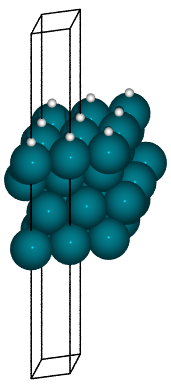

(calc = MACE) Adsorption energy for Rh: 0.2593 eV

Running simulation for Ni
       Step     Time          Energy          fmax
LBFGS:    0 00:06:27      -21.682352        0.303453
LBFGS:    1 00:06:27      -21.684130        0.247332
LBFGS:    2 00:06:27      -21.687691        0.025276
(calc = MACE) Time taken for slab energy calculation: 0.66 seconds
       Step     Time          Energy          fmax
LBFGS:    0 00:06:27       -5.426504        5.052353
LBFGS:    1 00:06:27       -6.069035        4.057949
LBFGS:    2 00:06:28       -5.516536       13.457214
LBFGS:    3 00:06:28       -6.391144        2.745935
LBFGS:    4 00:06:28       -6.509168        1.784902
LBFGS:    5 00:06:28       -6.543470        1.537869
LBFGS:    6 00:06:28       -6.566714        0.343711
LBFGS:    7 00:06:29       -6.568492        0.082827
LBFGS:    8 00:06:29       -6.568589        0.009410
(calc = MACE) Time taken for gas energy calculation: 1.55 seconds
       Step     Time          Energy          fmax
L

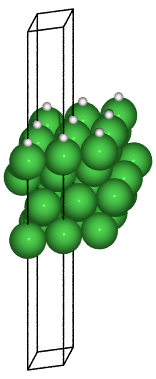

(calc = MACE) Adsorption energy for Ni: 0.4051 eV



In [44]:
from ase import Atoms
from ase.visualize import view
from gpaw import GPAW, PW
from ase.build import bulk, fcc111, add_adsorbate
from ase.constraints import FixAtoms
import time
import numpy as np

# Define parameters
elements = ['Au', 'Pt', 'Cu','Pd','Ag','Ir','Rh','Ni']
size = 1  # Example size, change as needed
N_layer = 4  # Number of layers for the slab
vac = 10.0  # Vacuum layer thickness
cutoff_energy = 400  # Energy cutoff for the plane waves

E_H_dict= {'MACE' : []}

calc_name, calc ='MACE' , mace_mp(model="medium",  dispersion=False,  default_dtype="float32",  device= "cpu")
E_H_list = []
for element in elements:
    print(f"Running simulation for {element}")

    surf = fcc111(element, (size, size, N_layer), vacuum=vac) # lattice constant will be taken from default tabulated values from ase
    median_z = np.median(surf.positions[:, 2])
    constraint = FixAtoms(mask=[atom.position[2] < (median_z + 0.01) for atom in surf])
    surf.set_constraint(constraint)

    surf.calc = calc

    start_time = time.time()

    E_slab = energy_cal(surf,calc)
    elapsed_time = time.time() - start_time
    print(f"(calc = {calc_name}) Time taken for slab energy calculation: {elapsed_time:.2f} seconds")
    # Set up the gas phase molecule (H2)
    gas = Atoms('H2',
                positions=[(0, 0, 0), (0, 0, 1.1)],
                cell=(a0, a0, a0),
                pbc=True)

    gas.calc = calc
    start_time = time.time()
    E_gas = energy_cal(gas,calc)
    elapsed_time = time.time() - start_time
    print(f"(calc = {calc_name}) Time taken for gas energy calculation: {elapsed_time:.2f} seconds")
    # Set up the adsorbate on the slab
    adsorbate_atom = Atoms('H')
    adslab = surf.copy()
    add_adsorbate(adslab, adsorbate_atom, 1.5, 'ontop')
    adslab.calc = calc
    start_time = time.time()
    E_adslab = energy_cal(adslab,calc)
    elapsed_time = time.time() - start_time
    print(f"(calc = {calc_name}) Time taken for adslab energy calculation: {elapsed_time:.2f} seconds")
    enlarge_and_visual(adslab)
    E_ads = E_adslab - E_gas / 2 - E_slab
    print(f'(calc = {calc_name}) Adsorption energy for {element}: {E_ads:.4f} eV\n')
    E_H_list.append(E_ads)

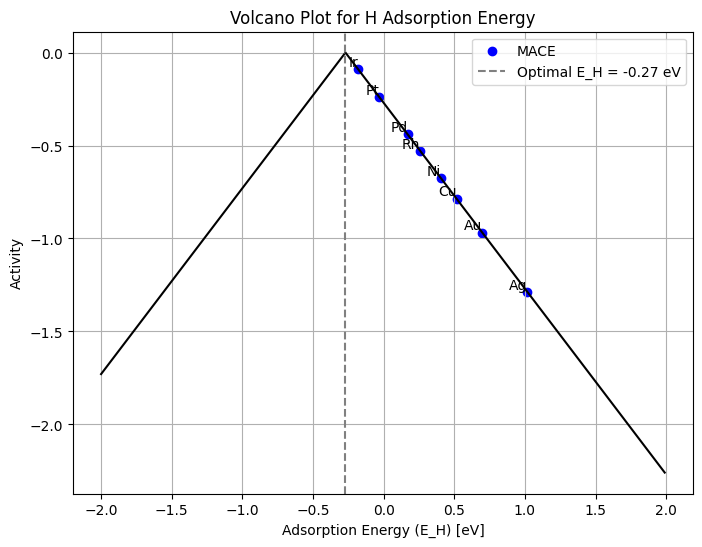

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Define the optimal value for the volcano plot
optimal_E_H = -0.27

# Generate x-values for the two lines
x_left = np.arange(-2, optimal_E_H, 0.01)
y_left = x_left - optimal_E_H

x_right = np.arange(optimal_E_H, 2, 0.01)
y_right = optimal_E_H - x_right

# Plot the volcano lines
plt.figure(figsize=(8, 6))
plt.plot(x_left, y_left, linestyle='-', color='black')
plt.plot(x_right, y_right, linestyle='-', color='black')

# Scatter the adsorption energies
activity_list=[-abs( optimal_E_H - x) for x in E_H_list]
plt.scatter(E_H_list, activity_list, color='blue', label = "MACE")

plt.axvline(x=optimal_E_H, color='gray', linestyle='--', label=f'Optimal E_H = {optimal_E_H} eV')
for i, element in enumerate(elements):
    plt.text(E_H_list[i], activity_list[i], element, fontsize=10, ha='right', va='bottom')

# Plot labels and title
plt.xlabel('Adsorption Energy (E_H) [eV]')
plt.ylabel('Activity')
plt.title('Volcano Plot for H Adsorption Energy')
plt.grid(True)
plt.legend()

plt.show()

https://www.science.org/doi/10.1126/science.aad4998

# __Visualize PES of H diffusioin on metal surface__

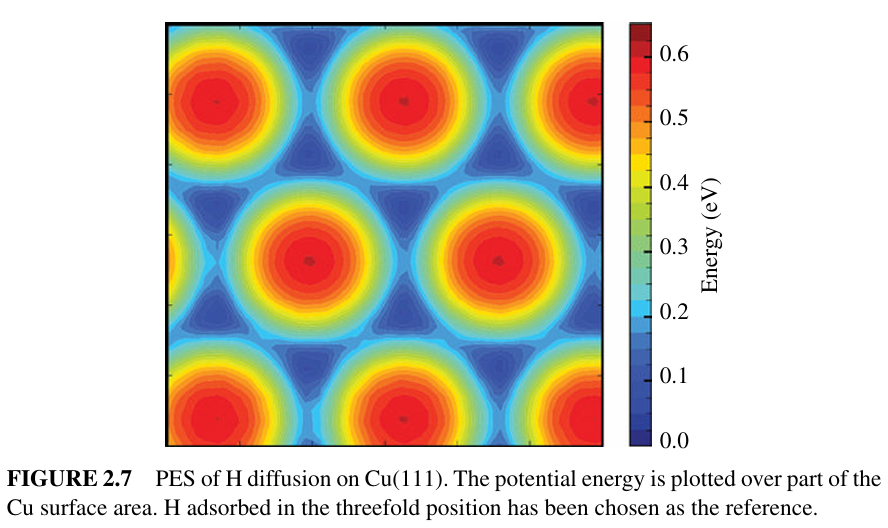

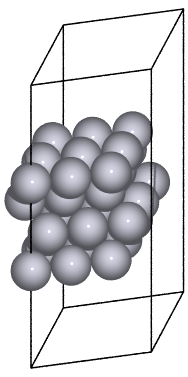

In [50]:
# make Pt 111 slab
from ase.build import fcc111

vac = 7.5
pt111_surf = fcc111('Pt', (3, 3, 4), vacuum=vac)

visual(pt111_surf)

In [51]:
from tqdm import tqdm

pt_z_max = np.max(pt111_surf.positions[:,-1])
pt_lattice_a, pt_lattice_b, _ = pt111_surf.cell.array[0], pt111_surf.cell.array[1], pt111_surf.cell.array[2]

grid = 20

a_range = np.linspace(0,1,grid)
b_range = np.linspace(0,1,grid)

E_heatmap = np.zeros([grid,grid])
mace_calc = mace_mp(model="medium", dispersion=False, default_dtype="float32",device= "cpu")

total_steps = grid * grid
with tqdm(total=total_steps, desc="Total Progress") as pbar:
    for idx_a, a in enumerate(a_range):
        for idx_b, b in enumerate(b_range):
            a_vec = pt_lattice_a * a
            b_vec = pt_lattice_b * b
            c_vec = np.array([0, 0, pt_z_max + 1.39])
            h_positions = a_vec + b_vec + c_vec

            H_atoms = Atoms(symbols=['H'], positions=[h_positions.tolist()])
            pt111_adslab = pt111_surf + H_atoms

            pt111_adslab.calc = mace_calc
            E_heatmap[idx_a, idx_b] = pt111_adslab.get_potential_energy()

            pbar.update(1)
print("Done!")

Using Materials Project MACE for MACECalculator with /root/.cache/mace/20231203mace128L1_epoch199model
Using float32 for MACECalculator, which is faster but less accurate. Recommended for MD. Use float64 for geometry optimization.


/usr/local/lib/python3.10/dist-packages/mace/calculators/mace.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(f=model_path, map_location=device)


Default dtype float32 does not match model dtype float64, converting models to float32.


Total Progress:   4%|▎         | 14/400 [00:14<06:52,  1.07s/it]


KeyboardInterrupt: 

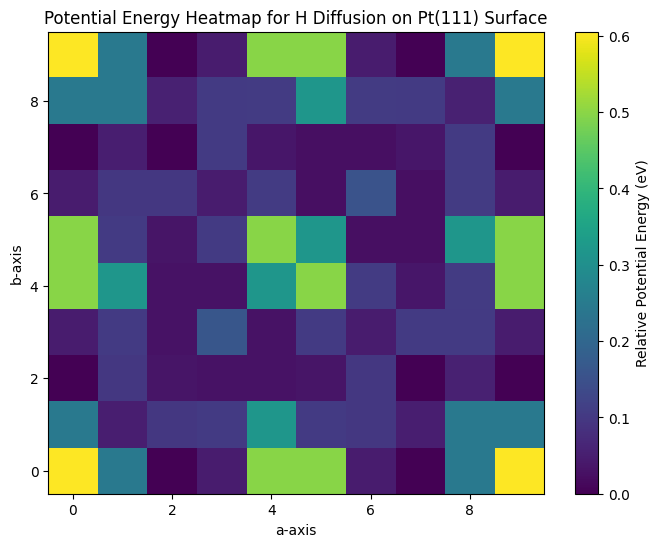

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

E_heatmap = E_heatmap - np.min(E_heatmap)

plt.figure(figsize=(8, 6))
heatmap = plt.imshow(E_heatmap, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(heatmap, label="Relative Potential Energy (eV)")  # Add color bar with label

plt.xlabel("a-axis")
plt.ylabel("b-axis")
plt.title("Potential Energy Heatmap for H Diffusion on Pt(111) Surface")

# Show plot
plt.show()

## __Optimization of the adsorption configuration of OH on FCC Pt__

In [ ]:
from ase.build import molecule

oh_atoms = molecule('OH')

O_index = [atom.index for atom in oh_atoms if atom.symbol == 'O'][0]
O_position = oh_atoms.positions[O_index]
oh_atoms.rotate(v='x', a=90, center=O_position)

oh_energy = energy_cal(oh_atoms,mace_calc,relax_atoms=False)
visual(oh_atoms)
oh_atoms.rotate(v='x', a=45, center=O_position)
visual(oh_atoms)
oh_atoms.rotate(v='x', a=45, center=O_position)
visual(oh_atoms)
oh_atoms.rotate(v='x', a=45, center=O_position)
visual(oh_atoms)
oh_atoms.rotate(v='x', a=45, center=O_position)
visual(oh_atoms)
oh_atoms.rotate(v='x', a=45, center=O_position)
print(f"OH energy : {oh_energy}")

In [ ]:
# site enumeration
from tqdm import tqdm
from ase.build import bulk, surface
from ase.build import add_adsorbate

size = 3 #  supercell size
vac = 7.5
miller_index = (1,1,1)

# surface layer number optimization
N_bulk_layer = 2 #
N_surface_layer = 2
n_atoms_list = []
surface_energy_list = []
time_list = []
mace_calc = mace_mp(model="medium", dispersion=False, default_dtype="float32", device= "cpu")

N_layer = N_bulk_layer + N_surface_layer

surf = surface(bulk_atoms, miller_index, N_layer)
surf = surf.repeat((size, size, 1))

surf.center(vacuum=vac, axis=2)
z_positions = surf.positions[:, 2]
sorted_indices = np.argsort(z_positions)
surf = surf[sorted_indices]

constraint = FixAtoms(mask=range(size*size*N_bulk_layer))
print(constraint)
surf.set_constraint(constraint)

surf_energy = energy_cal(surf,mace_calc)

########### adsorption configuration enumeration ############
surf_z_max = np.max(surf.positions[:,-1])
lattice_a, lattice_b, _ = surf.cell.array[0], surf.cell.array[1], surf.cell.array[2]

a_num = 2
b_num = 2
rot_num = 5
a_range = np.linspace(0,1,a_num)
b_range = np.linspace(0,1,b_num)
rot_range = np.linspace(0,180,rot_num)

total_num = a_num * b_num * rot_num
#################
surf_with_adsorbate_list = []
adsorption_energy_list = []
with tqdm(total=total_num, desc="Total Progress") as pbar:
    for rot in rot_range:
        oh_atoms = molecule('OH')
        O_index = [atom.index for atom in oh_atoms if atom.symbol == 'O'][0]
        O_position = oh_atoms.positions[O_index]
        oh_atoms.rotate(v='x', a=rot, center=O_position)
        for a in a_range:
            for b in b_range:
                a_vec = lattice_a * a
                b_vec = lattice_b * b
                c_vec = np.array([0, 0, surf_z_max + 1.39 + 1.0])
                oh_atoms.positions = (oh_atoms.positions - oh_atoms.get_center_of_mass()) + a_vec + b_vec + c_vec

                surf_with_adsorbate = copy.deepcopy(surf) + oh_atoms
                visual(surf_with_adsorbate)
                optimized_energy = energy_cal(surf_with_adsorbate,mace_calc,fmax=0.07)
                surf_with_adsorbate_list.append(surf_with_adsorbate)
                adsorption_energy = optimized_energy - (oh_energy + surf_energy)
                adsorption_energy_list.append(adsorption_energy)

                pbar.update(1)

In [ ]:
adsorption_energy_list

In [ ]:
min_ads_idx = np.argmin(np.array(adsorption_energy_list))

print(f"Optimized adsorption energy : {adsorption_energy_list[min_ads_idx]} eV")
visual(surf_with_adsorbate_list[min_ads_idx])